In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


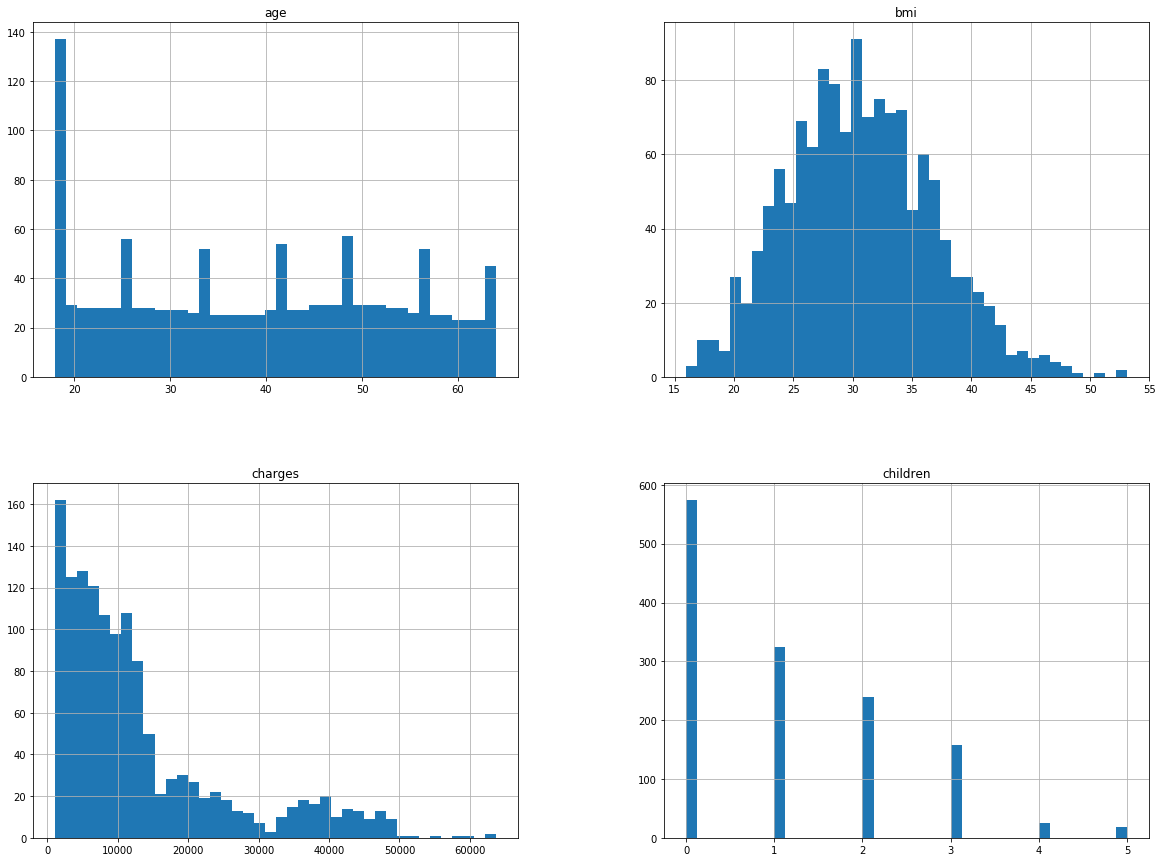

In [5]:
%matplotlib inline
dataset.hist(bins=40, figsize=(20, 15))
plt.show()

In [6]:
corr_matrix = dataset.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

/home/blooser/Documents/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f317fabbf28>,
      dtype=object)

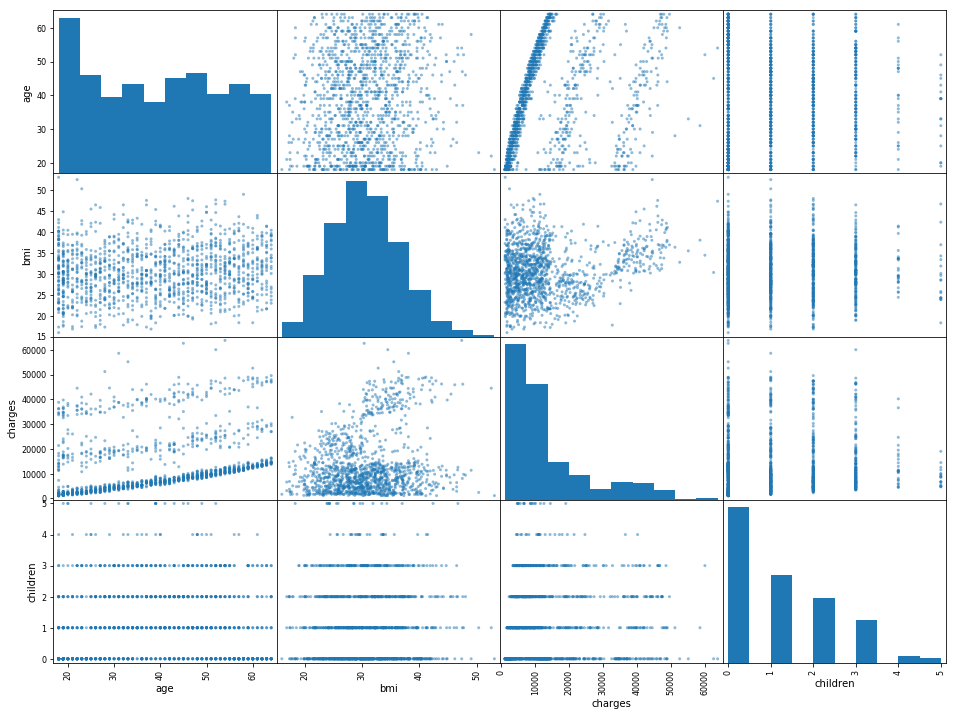

In [7]:
from pandas.tools.plotting import scatter_matrix

attributes = ["age", "bmi", "charges", "children"]
scatter_matrix(dataset[attributes], figsize=(16, 12))

In [8]:
X = pd.get_dummies(dataset.drop("charges", axis=1)).values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
from sklearn.metrics import mean_squared_error

y_train_pred_test = lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_train_pred_test))

5796.596058573129

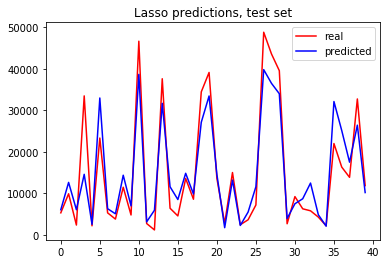

In [40]:
plt.plot(y_test[140:180], color='red', label='real')
plt.plot(y_train_pred_test[140:180], color='blue', label='predicted')
plt.title("Lasso predictions, test set")
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso, X_train, y_train, scoring="neg_mean_squared_error" ,cv=10)
scores = np.sqrt(-scores)

In [22]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [23]:
display_scores(scores)

Scores:  [6073.79907768 6580.59381721 5233.71713869 6045.07519105 5836.60976916
 6126.75148286 7280.98973516 6321.29453949 6193.07818121 5637.25921686]
Mean:  6132.916814935586
Std:  520.6606507447619


In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lasso, X_train, y_train, cv=10)
np.sqrt(mean_squared_error(y_train, y_train_pred))

6154.978161793396

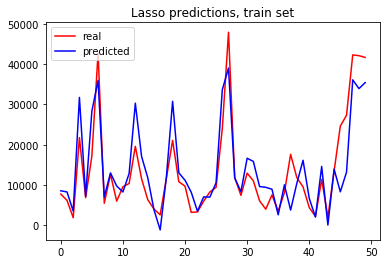

In [39]:
plt.plot(y_train[90:140], color='red', label='real')
plt.plot(y_train_pred[90:140], color='blue', label='predicted')
plt.title("Lasso predictions, train set")
plt.legend()
plt.show()